<a href="https://colab.research.google.com/github/Teacher-Heiko/fastbook/blob/master/09_TabularLearnerfromDocs_and_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
from fastai.tabular.all import *

In [146]:
import warnings
warnings.filterwarnings('ignore')

In [147]:
path = untar_data(URLs.ADULT_SAMPLE)
path.ls()

(#3) [Path('/root/.fastai/data/adult_sample/export.pkl'),Path('/root/.fastai/data/adult_sample/adult.csv'),Path('/root/.fastai/data/adult_sample/models')]

In [148]:
df = pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


# Easy way

In [149]:
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

In [150]:
 dls.xs.iloc[:2]  # or dls.train_ds.iloc[:2]

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num
22445,5,3,3,4,1,5,1,0.468245,-1.518416,-0.813199
28906,5,4,5,10,2,5,1,-0.996643,0.064058,-3.164649


In [151]:
dls.show_batch()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Private,Assoc-voc,Never-married,Priv-house-serv,Not-in-family,White,False,22.000000,125010.002333,11.0,<50k
1,Private,9th,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,False,72.000001,74141.006026,5.0,>=50k
2,Self-emp-not-inc,Bachelors,Divorced,Exec-managerial,Not-in-family,Asian-Pac-Islander,False,47.000000,162924.000546,13.0,<50k
3,?,Some-college,Never-married,?,Own-child,White,False,20.000001,293136.002574,10.0,<50k
4,Private,Some-college,Never-married,Tech-support,Not-in-family,White,False,32.000000,182975.000109,10.0,<50k
5,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,Black,False,33.000000,206279.999960,9.0,<50k
6,Private,HS-grad,Never-married,Craft-repair,Not-in-family,Black,False,27.000000,287476.000019,9.0,<50k
7,Self-emp-inc,12th,Widowed,Exec-managerial,Not-in-family,White,False,56.000001,32316.002932,8.0,<50k
8,Private,Some-college,Separated,Machine-op-inspct,Not-in-family,White,False,38.000000,101977.997241,10.0,>=50k
9,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,White,False,59.000000,279636.002657,9.0,<50k


In [152]:
learn = tabular_learner(dls, metrics=accuracy)

In [153]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.358203,0.362976,0.835381,00:06


In [154]:
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,5.0,1.0,6.0,13.0,5.0,5.0,1.0,1.127445,0.913602,-1.597016,0.0,0.0
1,7.0,16.0,3.0,6.0,1.0,5.0,1.0,1.200689,-0.046426,-0.029383,1.0,0.0
2,5.0,12.0,6.0,9.0,5.0,5.0,1.0,-1.069888,-0.995537,-0.421291,0.0,0.0
3,5.0,16.0,6.0,0.0,3.0,3.0,1.0,-0.190955,0.003702,-0.029383,0.0,0.0
4,7.0,11.0,3.0,11.0,1.0,5.0,1.0,0.614734,-0.783624,2.322067,1.0,1.0
5,8.0,13.0,5.0,0.0,2.0,5.0,1.0,-0.996643,-0.813553,1.538250,0.0,0.0
6,5.0,12.0,5.0,4.0,2.0,5.0,1.0,-1.143132,0.971465,-0.421291,0.0,0.0
7,5.0,12.0,3.0,13.0,1.0,5.0,1.0,-1.143132,0.444709,-0.421291,0.0,0.0
8,6.0,12.0,3.0,9.0,6.0,5.0,1.0,-0.044466,-0.012915,-0.421291,0.0,0.0


In [155]:
test_df = df.copy()
test_df.drop(['salary'], axis=1, inplace=True)
dl = learn.dls.test_dl(test_df)

In [156]:
learn.get_preds(dl=dl)

(tensor([[0.7623, 0.2377],
         [0.5039, 0.4961],
         [0.8192, 0.1808],
         ...,
         [0.7427, 0.2573],
         [0.9055, 0.0945],
         [0.9306, 0.0694]]),
 None)

# fastai with Other Libraries

In [157]:
df = pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [158]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

In [159]:
to = TabularPandas(df, procs=[Categorify, FillMissing,Normalize],
                   cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
                   cont_names = ['age', 'fnlwgt', 'education-num'],
                   y_names='salary',
                   splits=splits)

In [160]:
to.xs.iloc[:3]

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num
30946,5,16,3,13,6,5,1,-1.143520,0.366321,-0.033148
30973,5,11,3,11,1,5,1,0.470966,-0.228535,2.314309
1646,5,16,3,11,6,4,1,0.324194,0.074012,-0.033148


In [161]:
X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [162]:
X_train.info(), y_train.shape,

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26049 entries, 30946 to 2247
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   workclass         26049 non-null  int8   
 1   education         26049 non-null  int8   
 2   marital-status    26049 non-null  int8   
 3   occupation        26049 non-null  int8   
 4   relationship      26049 non-null  int8   
 5   race              26049 non-null  int8   
 6   education-num_na  26049 non-null  int8   
 7   age               26049 non-null  float64
 8   fnlwgt            26049 non-null  float64
 9   education-num     26049 non-null  float64
dtypes: float64(3), int8(7)
memory usage: 992.1 KB


(None, (26049,))

In [163]:
X_test.info(), y_test.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6512 entries, 24343 to 30352
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   workclass         6512 non-null   int8   
 1   education         6512 non-null   int8   
 2   marital-status    6512 non-null   int8   
 3   occupation        6512 non-null   int8   
 4   relationship      6512 non-null   int8   
 5   race              6512 non-null   int8   
 6   education-num_na  6512 non-null   int8   
 7   age               6512 non-null   float64
 8   fnlwgt            6512 non-null   float64
 9   education-num     6512 non-null   float64
dtypes: float64(3), int8(7)
memory usage: 248.0 KB


(None, (6512,))

In [164]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a decision tree classifier
tree = DecisionTreeClassifier()

In [165]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [166]:
predictions = tree.predict(X_test)

In [167]:
# Calculate the accuracy of the predictions using the test data
accuracy = accuracy_score(y_test, predictions)

# Print the predictions and accuracy
print("Predictions:", predictions)
print("Accuracy:", accuracy)

correct_predictions = (y_test == predictions).sum()
incorrect_predictions = (y_test != predictions).sum()

print("Number of correct predictions:", correct_predictions)
print("Number of incorrect predictions:", incorrect_predictions)

Predictions: [0 0 0 ... 0 1 0]
Accuracy: 0.7725737100737101
Number of correct predictions: 5031
Number of incorrect predictions: 1481


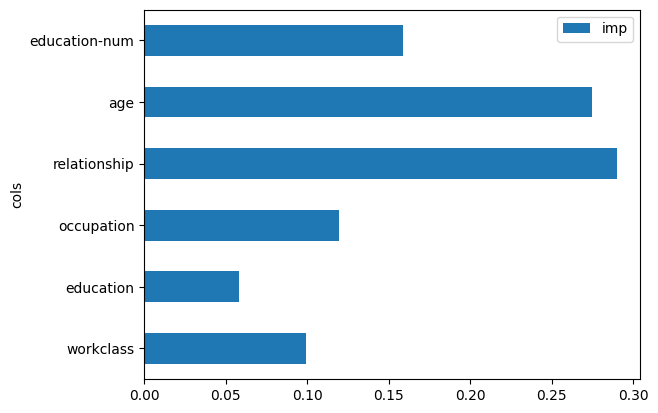

In [182]:
pd.DataFrame(dict(cols=X_train.columns, imp=tree.feature_importances_)).plot('cols', 'imp', 'barh');

In [169]:
X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [170]:
# X_test.info(), X_test.info(),

In [171]:
drop_cols = ['fnlwgt', 'education-num_na', 'race', 'marital-status']

In [172]:
X_train = X_train.drop(drop_cols, axis=1, inplace=False)
X_test = X_test.drop(drop_cols, axis=1, inplace=False)

In [87]:
# X_train = X_train.drop(['fnlwgt'], axis=1, inplace=False)
# X_train = X_train.drop(['education-num_na'], axis=1, inplace=False)
# X_test = X_test.drop(['fnlwgt'], axis=1, inplace=False)
# X_test = X_test.drop(['education-num_na'], axis=1, inplace=False)

In [90]:
# X_test.info(), X_test.info(),

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6512 entries, 8478 to 22895
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   workclass       6512 non-null   int8   
 1   education       6512 non-null   int8   
 2   marital-status  6512 non-null   int8   
 3   occupation      6512 non-null   int8   
 4   relationship    6512 non-null   int8   
 5   race            6512 non-null   int8   
 6   age             6512 non-null   float64
 7   education-num   6512 non-null   float64
dtypes: float64(2), int8(6)
memory usage: 190.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6512 entries, 8478 to 22895
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   workclass       6512 non-null   int8   
 1   education       6512 non-null   int8   
 2   marital-status  6512 non-null   int8   
 3   occupation      6512 non-null   int8   
 4   rela

(None, None)

In [173]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [174]:
predictions = tree.predict(X_test)

In [175]:
# Calculate the accuracy of the predictions using the test data
accuracy = accuracy_score(y_test, predictions)

# Print the predictions and accuracy
print("Predictions:", predictions)
print("Accuracy:", accuracy)

correct_predictions = (y_test == predictions).sum()
incorrect_predictions = (y_test != predictions).sum()

print("Number of correct predictions:", correct_predictions)
print("Number of incorrect predictions:", incorrect_predictions)

Predictions: [0 0 0 ... 0 1 0]
Accuracy: 0.7962223587223587
Number of correct predictions: 5185
Number of incorrect predictions: 1327


In [176]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import graphviz

def draw_tree(tree, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(tree, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

In [177]:
# draw_tree(tree, X_train, size=10)

In [209]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
forest = RandomForestClassifier(n_estimators=20, max_depth=10)

# Fit the decision tree on the categorical columns
forest.fit(X_train, y_train)

# Make predictions on the validation data
predictions = forest.predict(X_test)



In [210]:
# Calculate the accuracy of the predictions using the test data
accuracy = accuracy_score(y_test, predictions)

# Print the predictions and accuracy
print("Predictions:", predictions)
print("Accuracy:", accuracy)

correct_predictions = (y_test == predictions).sum()
incorrect_predictions = (y_test != predictions).sum()

print("Number of correct predictions:", correct_predictions)
print("Number of incorrect predictions:", incorrect_predictions)

Predictions: [0 0 0 ... 0 1 0]
Accuracy: 0.8350737100737101
Number of correct predictions: 5438
Number of incorrect predictions: 1074


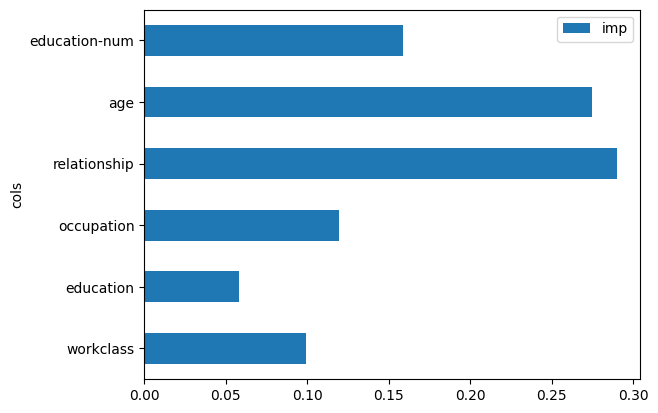

In [188]:
pd.DataFrame(dict(cols=X_train.columns, imp=tree.feature_importances_)).plot('cols', 'imp', 'barh');